In [2]:
# Import libraries
import os
import sys
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur agar plot dari matplotlib muncul di notebook
%matplotlib inline

# Atur agar plot tampil rapi
sns.set(style="whitegrid")

In [3]:
# Load dataset
try:
    df = pd.read_csv('../data/SSGI_2024_dataset.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan. Mohon periksa nama file dan lokasinya.")


Dataset berhasil dimuat!


In [4]:
# Menampilkan 5 baris pertama untuk melihat contoh data
print("--- 5 Baris Pertama Data ---")
print(df.head())

# Menampilkan informasi ringkas
print("\n--- Informasi Umum Dataset ---")
df.info()

# Menampilkan statistik deskriptif
print("\n--- Statistik Deskriptif ---")
print(df.describe().T)

--- 5 Baris Pertama Data ---
         Provinsi prevalensi_underweight_persen prevalensi_stunting_persen  \
0            Aceh                          23,7                       28,6   
1  Sumatera Utara                          17,7                         22   
2  Sumatera Barat                          18,8                       24,9   
3            Riau                          20,1                       20,1   
4           Jambi                          13,8                       17,1   

  prevalensi_wasting_persen persen_jarak_kehamilan_berisiko  \
0                       9,6                             9,7   
1                         9                            17,3   
2                         7                            13,8   
3                      10,8                            12,7   
4                       8,6                             5,1   

  persen_usia_ibu_berisiko persen_tidak_ikut_kelas_bumil  \
0                      9,4                          48,3   
1  

In [5]:
plot_data = df.copy()

# Mengubah kolom bertipe object menjadi float64, kecuali 'Provinsi'
for col in plot_data.columns:
    if col != 'Provinsi' and plot_data[col].dtype == 'object':
        plot_data[col] = plot_data[col].str.replace(',', '.', regex=False)
        plot_data[col] = pd.to_numeric(plot_data[col], errors='coerce')

print(plot_data.dtypes)


Provinsi                                     object
prevalensi_underweight_persen               float64
prevalensi_stunting_persen                  float64
prevalensi_wasting_persen                   float64
persen_jarak_kehamilan_berisiko             float64
persen_usia_ibu_berisiko                    float64
persen_tidak_ikut_kelas_bumil               float64
persen_masalah_buku_kia                     float64
persen_kia_tidak_dijelaskan                 float64
persen_anc_tidak_lengkap_k6                 float64
persen_anc_tempat_informal                  float64
persen_usg_tidak_lengkap                    float64
persen_usg_oleh_non_spesialis               float64
persen_tidak_patuh_minum_ttd                float64
persen_mulai_ttd_terlambat                  float64
persen_bblr                                 float64
persen_pblr                                 float64
persen_imd_terlambat                        float64
persen_tidak_pernah_asi                     float64
persen_tidak

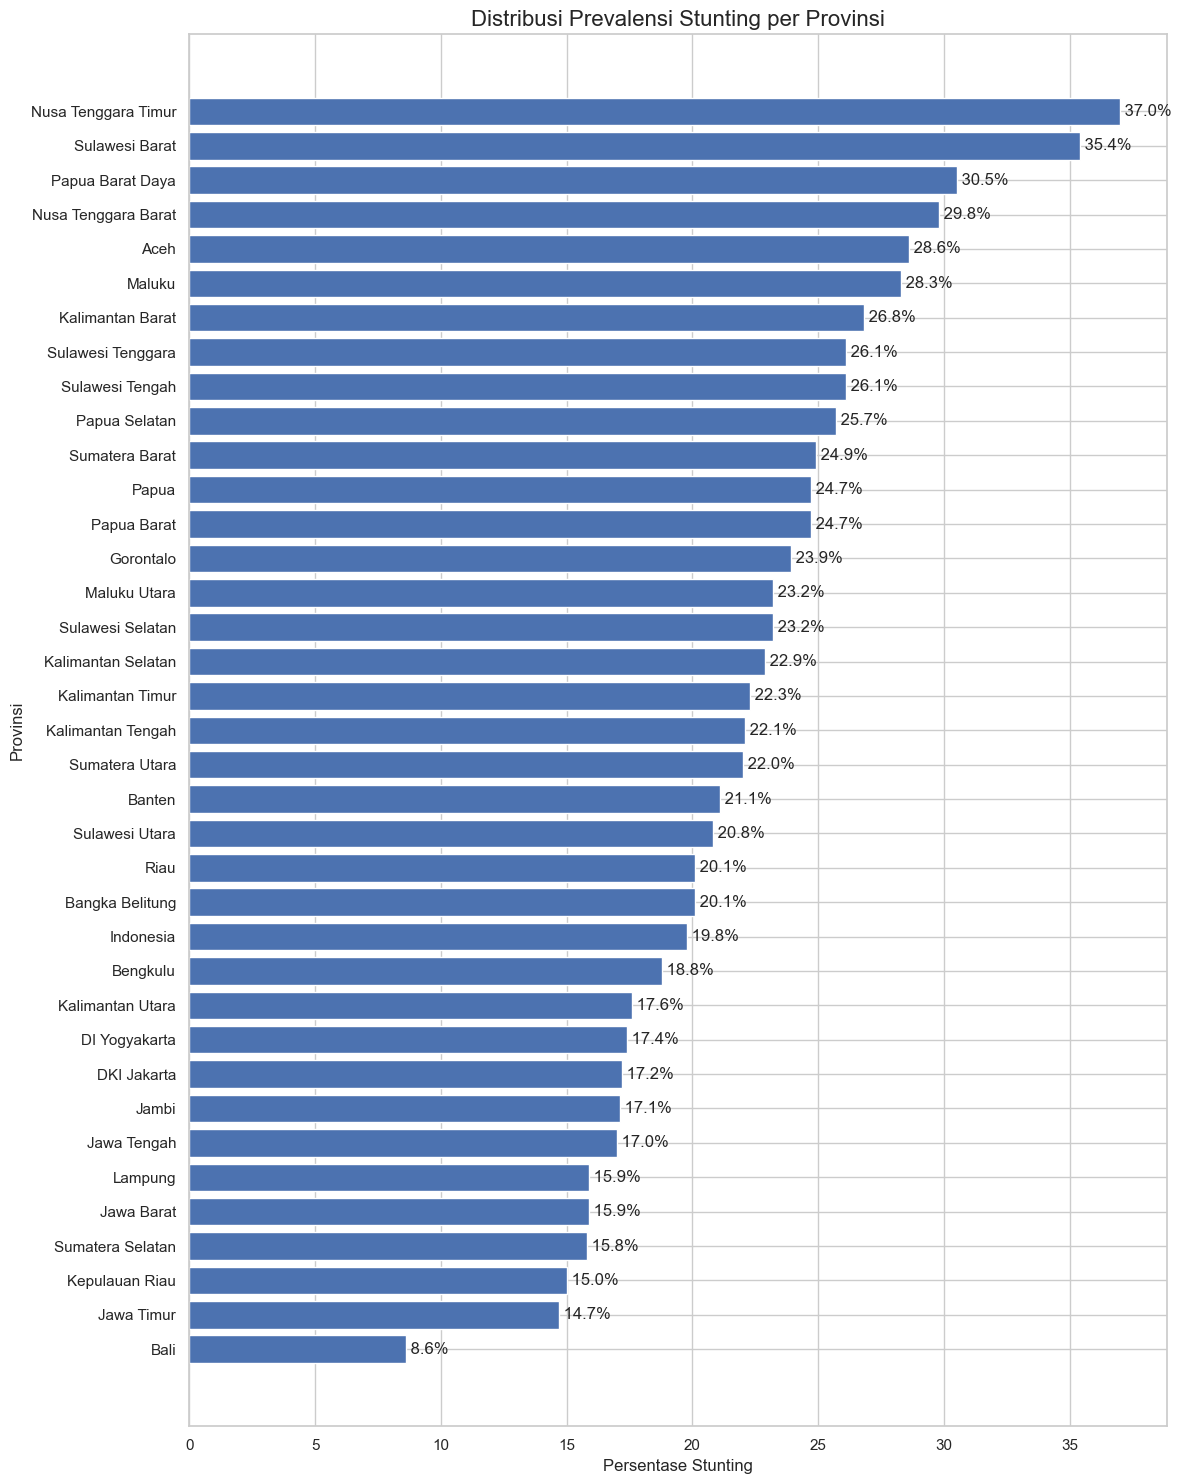

In [6]:
target_variable = 'prevalensi_stunting_persen'

# Create horizontal bar plot
plt.figure(figsize=(12, 15))

# Remove rows with NaN values and sort values in ascending order
plot_data_clean = plot_data.dropna(subset=[target_variable]).sort_values(by=target_variable, ascending=True)

# Create horizontal bar plot
plt.barh(plot_data_clean['Provinsi'], plot_data_clean[target_variable])
plt.title('Distribusi Prevalensi Stunting per Provinsi', fontsize=16)
plt.xlabel('Persentase Stunting')
plt.ylabel('Provinsi')

# Add value labels on the bars
for i, v in enumerate(plot_data_clean[target_variable]):
    plt.text(v, i, f' {v:.1f}%', va='center')

plt.tight_layout()
plt.show()

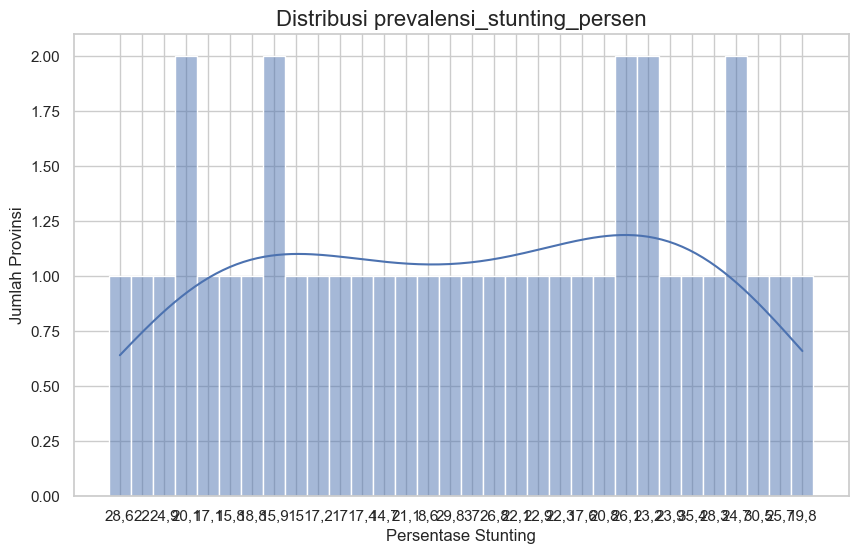


--- 5 Provinsi dengan Stunting Tertinggi ---
               Provinsi prevalensi_stunting_persen
16                 Bali                        8,6
18  Nusa Tenggara Timur                         37
29       Sulawesi Barat                       35,4
33     Papua Barat Daya                       30,5
17  Nusa Tenggara Barat                       29,8

--- 5 Provinsi dengan Stunting Terendah ---
            Provinsi prevalensi_stunting_persen
14        Jawa Timur                       14,7
9     Kepulauan Riau                         15
5   Sumatera Selatan                       15,8
7            Lampung                       15,9
11        Jawa Barat                       15,9


In [7]:
# Plot distribusi stunting menggunakan histogram dan KDE
plt.figure(figsize=(10, 6))
sns.histplot(df[target_variable], kde=True, bins=10)
plt.title(f'Distribusi {target_variable}', fontsize=16)
plt.xlabel('Persentase Stunting')
plt.ylabel('Jumlah Provinsi')
plt.show()

# Menampilkan provinsi dengan stunting tertinggi dan terendah
print("\n--- 5 Provinsi dengan Stunting Tertinggi ---")
print(df.sort_values(by=target_variable, ascending=False)[['Provinsi', target_variable]].head())

print("\n--- 5 Provinsi dengan Stunting Terendah ---")
print(df.sort_values(by=target_variable, ascending=True)[['Provinsi', target_variable]].head())


--- Korelasi Variabel Lain terhadap prevalensi_stunting_persen ---
prevalensi_stunting_persen                  1.000000
prevalensi_underweight_persen               0.934228
prevalensi_wasting_persen                   0.781322
persen_anc_tidak_lengkap_k6                 0.610368
persen_akses_sanitasi_berisiko              0.579484
persen_tidak_memenuhi_mmff                  0.576251
persen_usg_tidak_lengkap                    0.549585
persen_usia_ibu_berisiko                    0.511412
persen_usg_oleh_non_spesialis               0.506613
persen_tidak_memenuhi_mdd                   0.474258
persen_akses_air_minum_berisiko             0.468485
persen_konsumsi_minuman_manis               0.461836
persen_tidak_memenuhi_mad                   0.439443
persen_anc_tempat_informal                  0.439193
persen_imunisasi_dasar_incomplete           0.438372
persen_imunisasi_pcv_incomplete             0.417104
persen_keluarga_tanpa_tpk                   0.414828
persen_masalah_buku_kia        

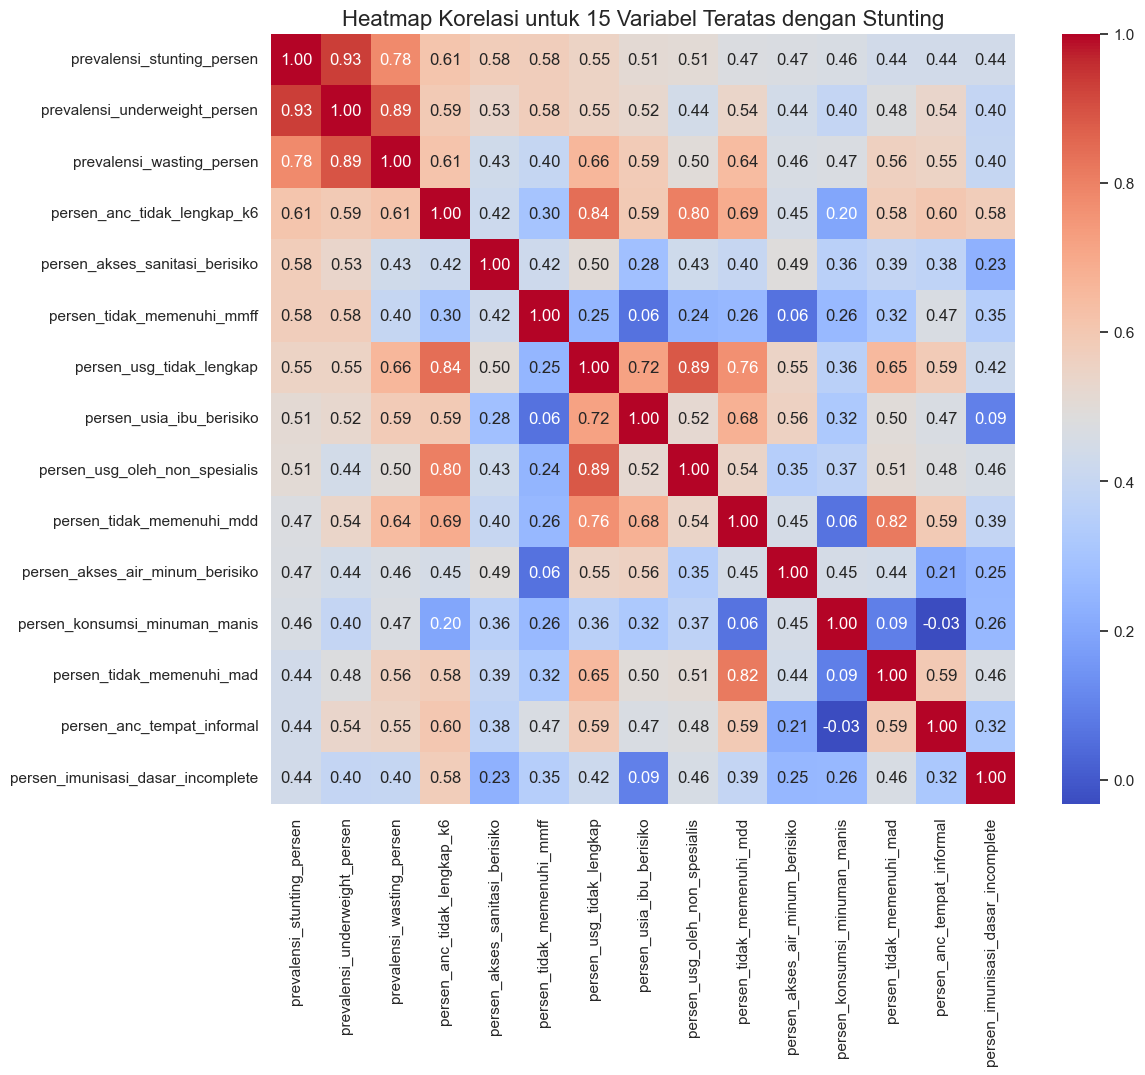

In [8]:
# Menghitung matriks korelasi
correlation_matrix = plot_data.corr(numeric_only=True)

# Menampilkan korelasi semua variabel terhadap stunting
# Diurutkan dari yang paling berkorelasi positif hingga negatif
stunting_correlation = correlation_matrix[target_variable].sort_values(ascending=False)

print(f"\n--- Korelasi Variabel Lain terhadap {target_variable} ---")
print(stunting_correlation)

# Visualisasi korelasi menggunakan heatmap (untuk 15 variabel teratas)
top_15_vars = stunting_correlation.head(15).index
plt.figure(figsize=(12, 10))
sns.heatmap(plot_data[top_15_vars].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi untuk 15 Variabel Teratas dengan Stunting', fontsize=16)
plt.show()

### Pre-processing 

In [9]:
# Drop rows for Papua Tengah, Papua Pegunungan, and Indonesia
provinces_to_drop = ['Papua Tengah', 'Papua Pegunungan', 'Indonesia']
plot_data_clean = plot_data_clean[~plot_data_clean['Provinsi'].isin(provinces_to_drop)]

print(f"Jumlah provinsi setelah pre-processing: {len(plot_data_clean)}")
print("\nDaftar provinsi:")
print(plot_data_clean['Provinsi'].values)

# Drop columns for prevalensi_underweight_persen and prevalensi_wasting_persen
columns_to_drop = ['prevalensi_underweight_persen', 'prevalensi_wasting_persen']
plot_data_clean = plot_data_clean.drop(columns=columns_to_drop)

print("\nKolom setelah penghapusan:")
print(plot_data_clean.columns)
print(f"Jumlah kolom setelah penghapusan: {len(plot_data_clean.columns)}")

Jumlah provinsi setelah pre-processing: 36

Daftar provinsi:
['Bali' 'Jawa Timur' 'Kepulauan Riau' 'Sumatera Selatan' 'Jawa Barat'
 'Lampung' 'Jawa Tengah' 'Jambi' 'DKI Jakarta' 'DI Yogyakarta'
 'Kalimantan Utara' 'Bengkulu' 'Bangka Belitung' 'Riau' 'Sulawesi Utara'
 'Banten' 'Sumatera Utara' 'Kalimantan Tengah' 'Kalimantan Timur'
 'Kalimantan Selatan' 'Sulawesi Selatan' 'Maluku Utara' 'Gorontalo'
 'Papua Barat' 'Papua' 'Sumatera Barat' 'Papua Selatan' 'Sulawesi Tengah'
 'Sulawesi Tenggara' 'Kalimantan Barat' 'Maluku' 'Aceh'
 'Nusa Tenggara Barat' 'Papua Barat Daya' 'Sulawesi Barat'
 'Nusa Tenggara Timur']

Kolom setelah penghapusan:
Index(['Provinsi', 'prevalensi_stunting_persen',
       'persen_jarak_kehamilan_berisiko', 'persen_usia_ibu_berisiko',
       'persen_tidak_ikut_kelas_bumil', 'persen_masalah_buku_kia',
       'persen_kia_tidak_dijelaskan', 'persen_anc_tidak_lengkap_k6',
       'persen_anc_tempat_informal', 'persen_usg_tidak_lengkap',
       'persen_usg_oleh_non_spesialis'

In [10]:
# Check for missing values in the dataset
missing_values = plot_data_clean.isnull().sum()

# Display columns with missing values (if any)
missing_values = missing_values[missing_values > 0]
if len(missing_values) > 0:
    print("Columns with missing values:")
    print(missing_values)
else:
    print("No missing values found in the dataset")
    
# Display total number of rows and columns
print(f"\nDataset shape: {plot_data_clean.shape}")

# Display data types for each column
print("\nData types for each column:")
print(plot_data_clean.dtypes)

No missing values found in the dataset

Dataset shape: (36, 56)

Data types for each column:
Provinsi                                     object
prevalensi_stunting_persen                  float64
persen_jarak_kehamilan_berisiko             float64
persen_usia_ibu_berisiko                    float64
persen_tidak_ikut_kelas_bumil               float64
persen_masalah_buku_kia                     float64
persen_kia_tidak_dijelaskan                 float64
persen_anc_tidak_lengkap_k6                 float64
persen_anc_tempat_informal                  float64
persen_usg_tidak_lengkap                    float64
persen_usg_oleh_non_spesialis               float64
persen_tidak_patuh_minum_ttd                float64
persen_mulai_ttd_terlambat                  float64
persen_bblr                                 float64
persen_pblr                                 float64
persen_imd_terlambat                        float64
persen_tidak_pernah_asi                     float64
persen_tidak_asi_eksklu

In [11]:
# Variable y (output)
y = plot_data_clean[target_variable]

# Variable X (input)
X = plot_data_clean.drop(['Provinsi', target_variable], axis=1)

# Data dimension check
print("Dimensi X:", X.shape)
print("Dimensi y:", y.shape)

# Display first few rows of X and y
print("\nSampel X:")
print(X.head())
print("\nSampel y:")
print(y.head())

Dimensi X: (36, 54)
Dimensi y: (36,)

Sampel X:
    persen_jarak_kehamilan_berisiko  persen_usia_ibu_berisiko  \
16                              9.5                      12.5   
14                             10.4                      13.1   
9                              10.6                      10.3   
5                               9.2                      13.3   
11                              9.7                      12.4   

    persen_tidak_ikut_kelas_bumil  persen_masalah_buku_kia  \
16                           79.1                     12.0   
14                           63.5                      7.6   
9                            88.3                     24.5   
5                            67.5                     42.4   
11                           64.5                     13.2   

    persen_kia_tidak_dijelaskan  persen_anc_tidak_lengkap_k6  \
16                         67.2                         32.4   
14                         54.5                         64.6

## Random Forest Modelling

### Tuning Hyperparameter

In [12]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

In [13]:
model = RandomForestRegressor(random_state=42)
loocv = LeaveOneOut()

print("Parameter grid for tuning:")
print(param_grid)

Parameter grid for tuning:
{'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7, None], 'min_samples_leaf': [1, 2, 3], 'max_features': ['sqrt', 'log2', None]}


In [14]:
scorers = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error'
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=loocv, 
    scoring=scorers,
    refit='mae',  # Use MAE as the primary metric for selecting the best model
    n_jobs=-1, 
    verbose=2)

print("Starting grid search...")
grid_search.fit(X, y)
print("Grid search completed.")

# Get scores for both metrics
mae_scores = -grid_search.cv_results_['mean_test_mae']
rmse_scores = -grid_search.cv_results_['mean_test_rmse']

# Get the index of the best model
best_index = grid_search.best_index_

print("\nBest model scores:")
print(f"MAE: {mae_scores[best_index]:.4f}")
print(f"RMSE: {rmse_scores[best_index]:.4f}")

Starting grid search...
Fitting 36 folds for each of 108 candidates, totalling 3888 fits
Grid search completed.

Best model scores:
MAE: 3.4378
RMSE: 3.4378


In [15]:
print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print("\nModel Performance:")
print(f"Best Mean Absolute Error (MAE): {-grid_search.cv_results_['mean_test_mae'][grid_search.best_index_]:.2f}")
print(f"Best Root Mean Squared Error (RMSE): {-grid_search.cv_results_['mean_test_rmse'][grid_search.best_index_]:.2f}")


Best parameters found:
max_depth: 5
max_features: log2
min_samples_leaf: 1
n_estimators: 100

Model Performance:
Best Mean Absolute Error (MAE): 3.44
Best Root Mean Squared Error (RMSE): 3.44


### Final Model Training

In [16]:
# Print best parameters dan deklarasi model final
best_params = grid_search.best_params_
print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Declare final model with best parameters
model_final = RandomForestRegressor(**best_params, random_state=42)



Best parameters found:
max_depth: 5
max_features: log2
min_samples_leaf: 1
n_estimators: 100


In [17]:
model_final.fit(X, y)

print("Model final telah selesai dilatih dengan seluruh data!")

Model final telah selesai dilatih dengan seluruh data!


In [18]:
# Tampilkan hasil prediksi pada data training
y_pred = model_final.predict(X)
print("\nHasil prediksi pada data training:")
print(y_pred)


Hasil prediksi pada data training:
[12.56465873 16.77399716 16.96485775 18.36685997 17.75543233 18.62972711
 18.49021466 17.78383075 18.23962241 17.25080852 19.22654979 19.66328656
 20.74335222 20.92786583 22.72643987 21.56477575 22.50058285 23.28610269
 21.93964569 21.89571883 22.7667952  24.68231699 23.94457897 24.80436223
 24.81996931 24.5175901  25.74530276 25.47049403 25.37615016 24.97575215
 26.58315698 26.30102423 27.03582381 27.80783956 31.28463462 33.81512552]


In [19]:
# Create a DataFrame with actual and predicted values, including province names
comparison_df = pd.DataFrame({
    'Provinsi': plot_data_clean['Provinsi'],
    'Actual': y,
    'Predicted': y_pred,
    'Difference': y - y_pred
})

# Sort by actual stunting prevalence
comparison_df = comparison_df.sort_values('Actual')

# Display the results with proper formatting
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nPerbandingan nilai aktual dan prediksi:")
print(comparison_df)

# Calculate average error
print("\nRata-rata selisih absolut:", abs(comparison_df['Difference']).mean().round(2))


Perbandingan nilai aktual dan prediksi:
               Provinsi  Actual  Predicted  Difference
16                 Bali    8.60      12.56       -3.96
14           Jawa Timur   14.70      16.77       -2.07
9        Kepulauan Riau   15.00      16.96       -1.96
5      Sumatera Selatan   15.80      18.37       -2.57
11           Jawa Barat   15.90      17.76       -1.86
7               Lampung   15.90      18.63       -2.73
12          Jawa Tengah   17.00      18.49       -1.49
4                 Jambi   17.10      17.78       -0.68
10          DKI Jakarta   17.20      18.24       -1.04
13        DI Yogyakarta   17.40      17.25        0.15
23     Kalimantan Utara   17.60      19.23       -1.63
6              Bengkulu   18.80      19.66       -0.86
8       Bangka Belitung   20.10      20.74       -0.64
3                  Riau   20.10      20.93       -0.83
24       Sulawesi Utara   20.80      22.73       -1.93
15               Banten   21.10      21.56       -0.46
1        Sumatera Utara 

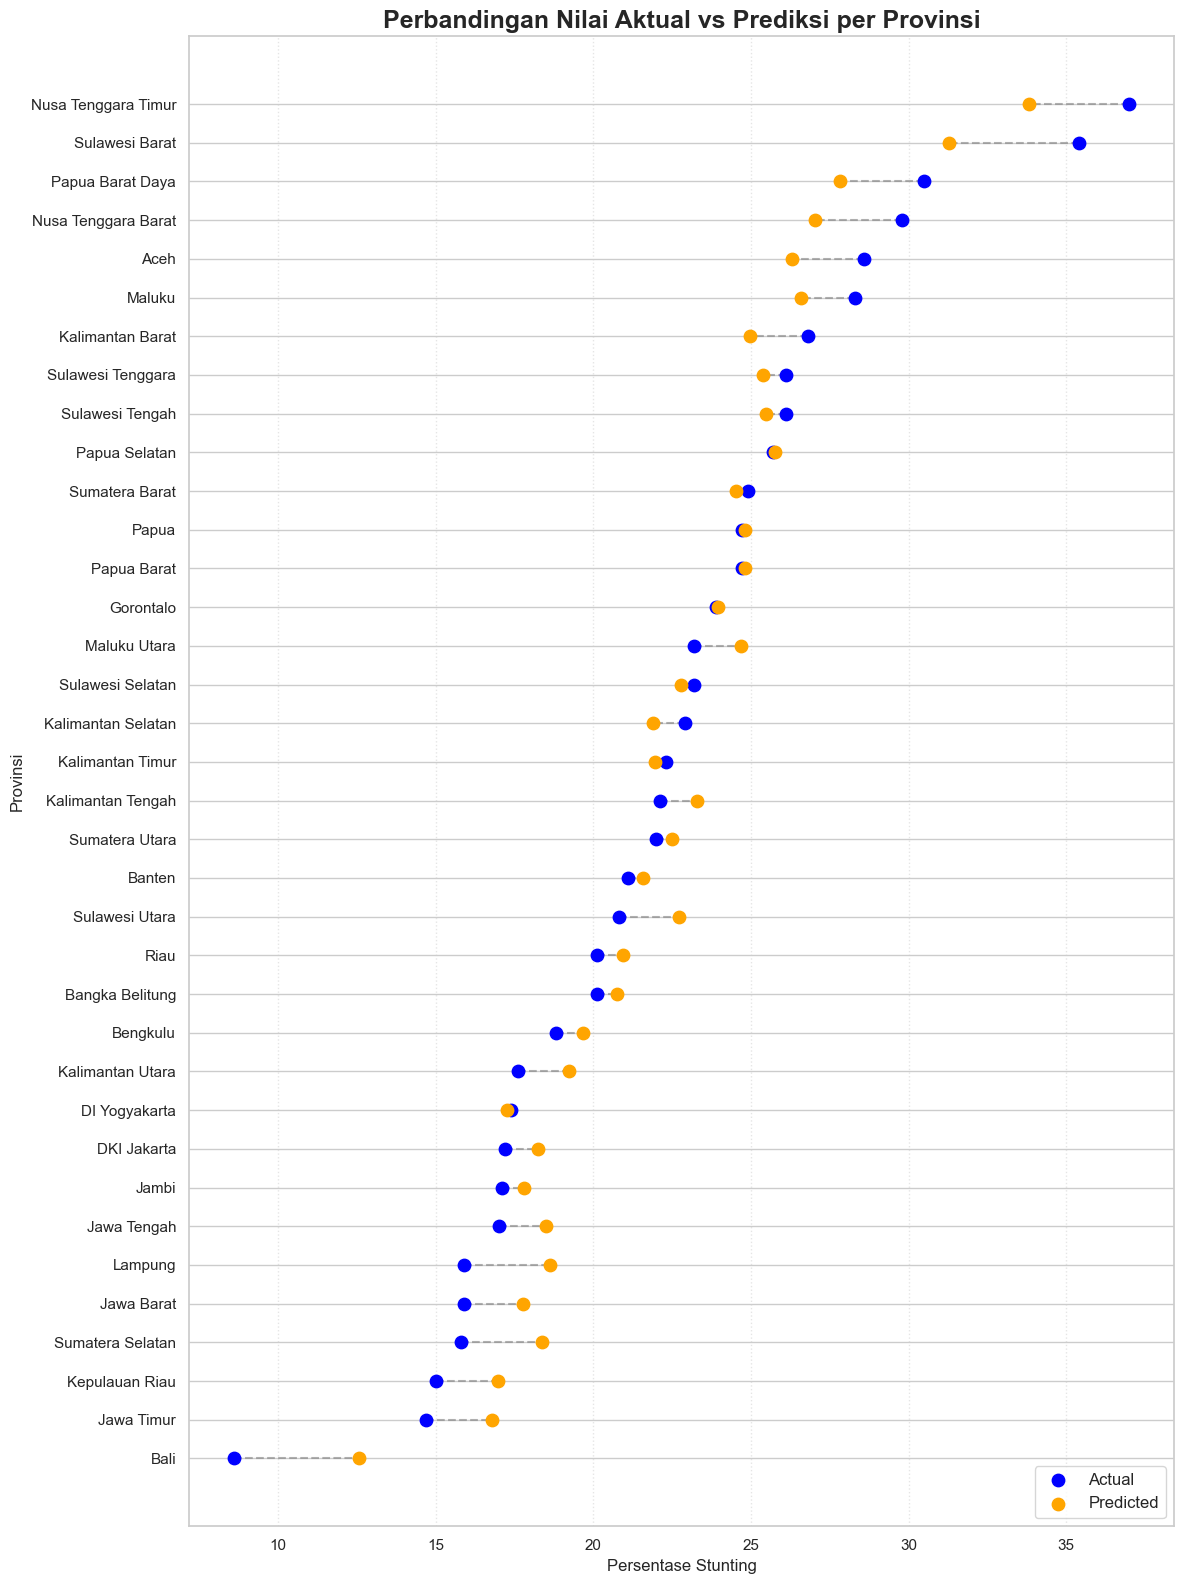

In [20]:
# Visualization of Actual vs Predicted values
df_sorted = comparison_df.sort_values(by='Actual', ascending=True).reset_index()
plt.figure(figsize=(12, 16)) 
plt.hlines(
    y=df_sorted.index, 
    xmin=df_sorted['Actual'],
    xmax=df_sorted['Predicted'],
    color='grey',
    alpha=0.6,
    linestyle='--'
)

plt.scatter(
    df_sorted['Actual'],
    df_sorted.index,
    color='blue',
    label='Actual',
    s=80,  
    zorder=3 
)
plt.scatter(
    df_sorted['Predicted'],
    df_sorted.index,
    color='orange',
    label='Predicted',
    s=80,
    zorder=3
)

plt.title('Perbandingan Nilai Aktual vs Prediksi per Provinsi', fontsize=18, fontweight='bold')
plt.xlabel('Persentase Stunting', fontsize=12)
plt.ylabel('Provinsi', fontsize=12)
plt.yticks(df_sorted.index, df_sorted['Provinsi'])
plt.legend(fontsize=12, loc='lower right')
plt.grid(axis='x', linestyle=':', alpha=0.5) 
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Calculate and display percentage error
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.40
Mean Squared Error (MSE): 3.15
Root Mean Squared Error (RMSE): 1.77
R-squared (R²): 0.9090
Mean Absolute Percentage Error (MAPE): 7.22%


## SHAP (SHapley Additive exPlanations) Implementation

In [22]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(X)

# SHAP Values dimension check
print("Dimensi SHAP values:", np.shape(shap_values))

c:\Users\Cindy Nadila Putri\anaconda3\envs\tastunting\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dimensi SHAP values: (36, 54)


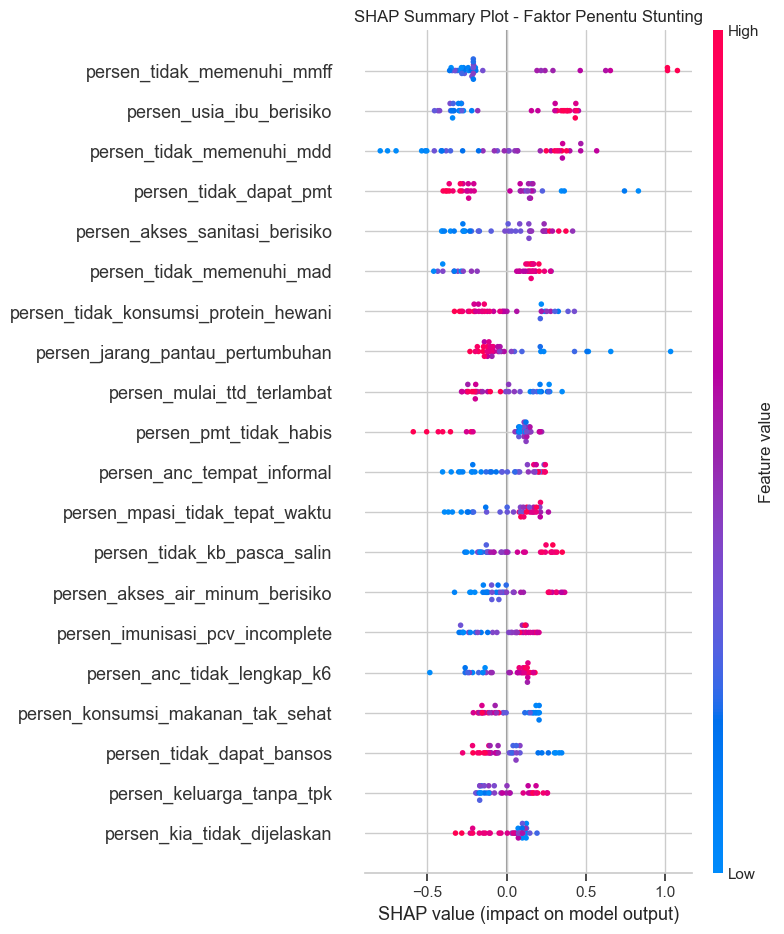

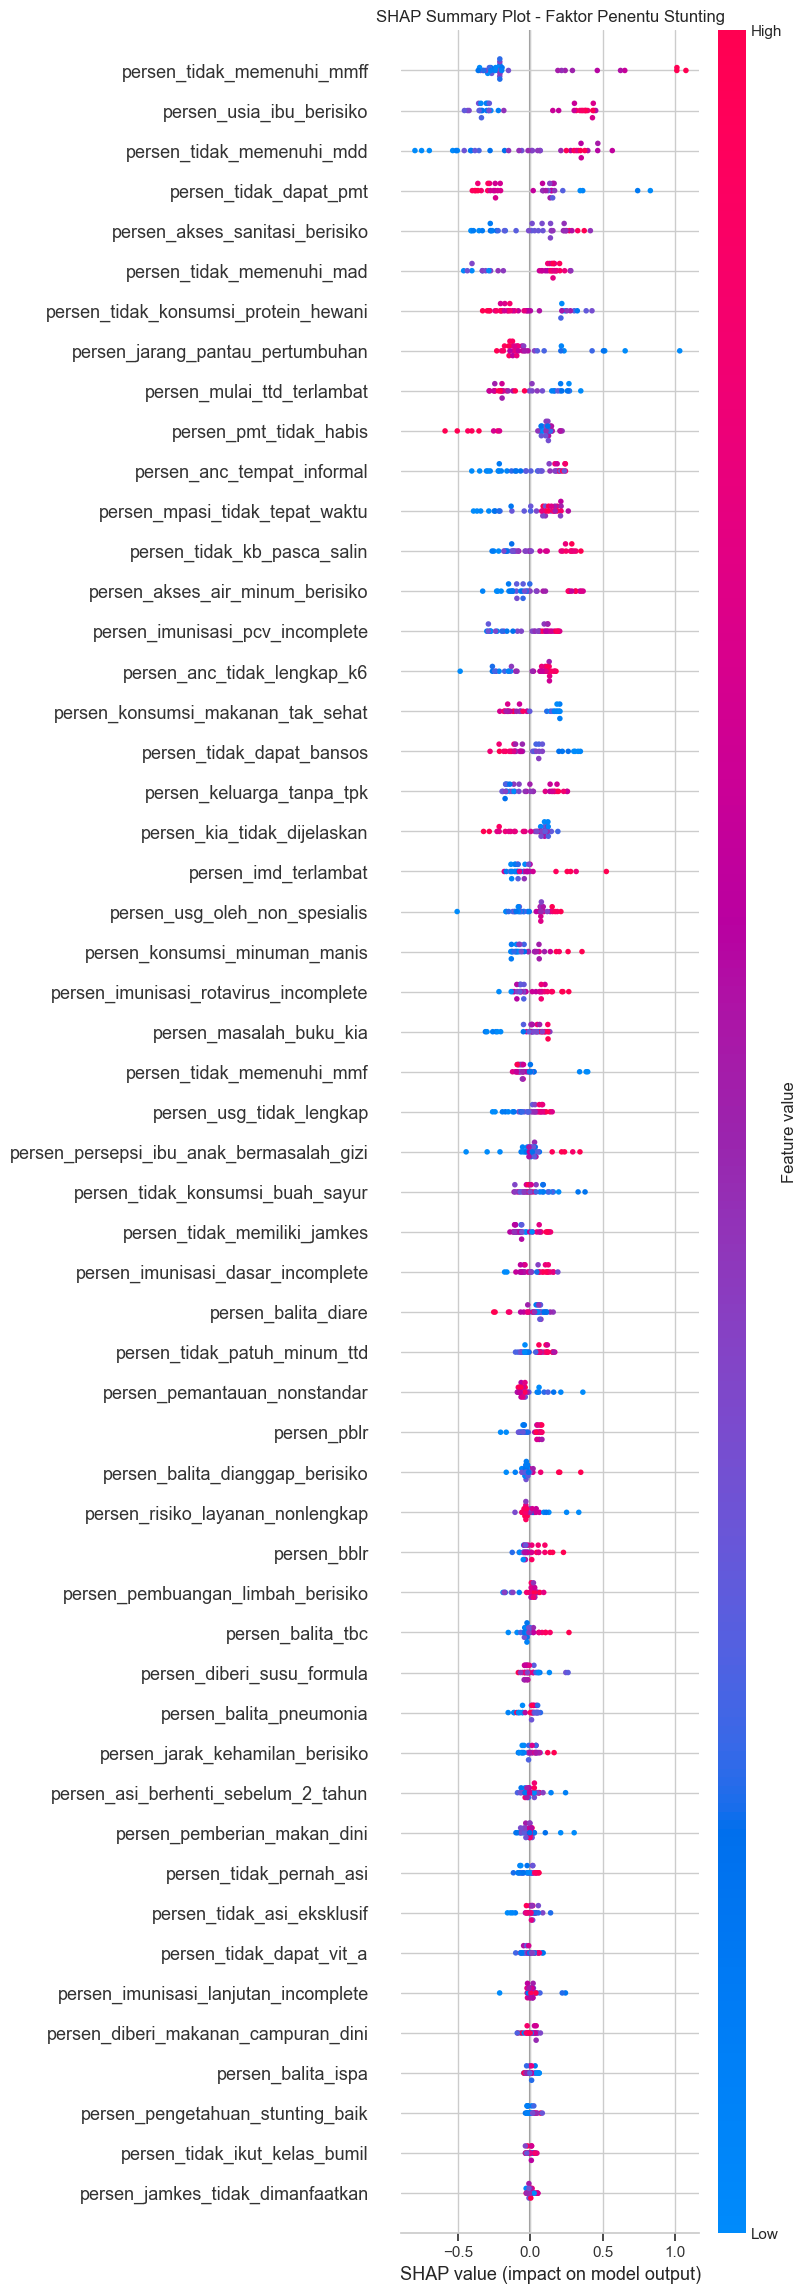

In [23]:
# SHAP Summary plot
plt.title("SHAP Summary Plot - Faktor Penentu Stunting")
shap.summary_plot(shap_values, X)

plt.title("SHAP Summary Plot - Faktor Penentu Stunting")
shap.summary_plot(shap_values, X, max_display=len(X.columns))

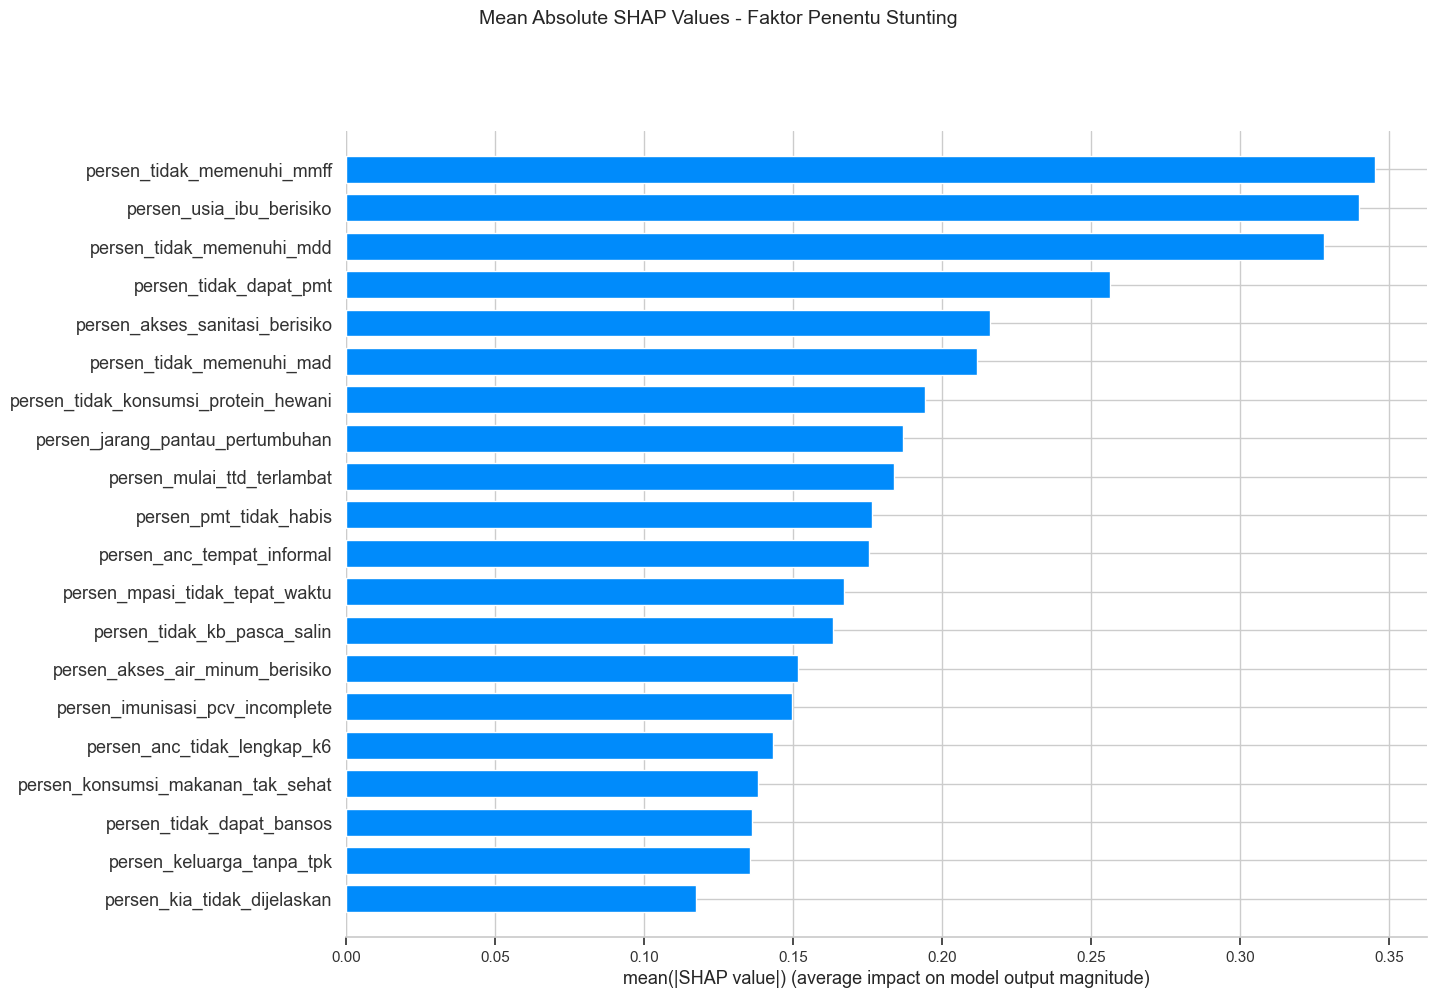

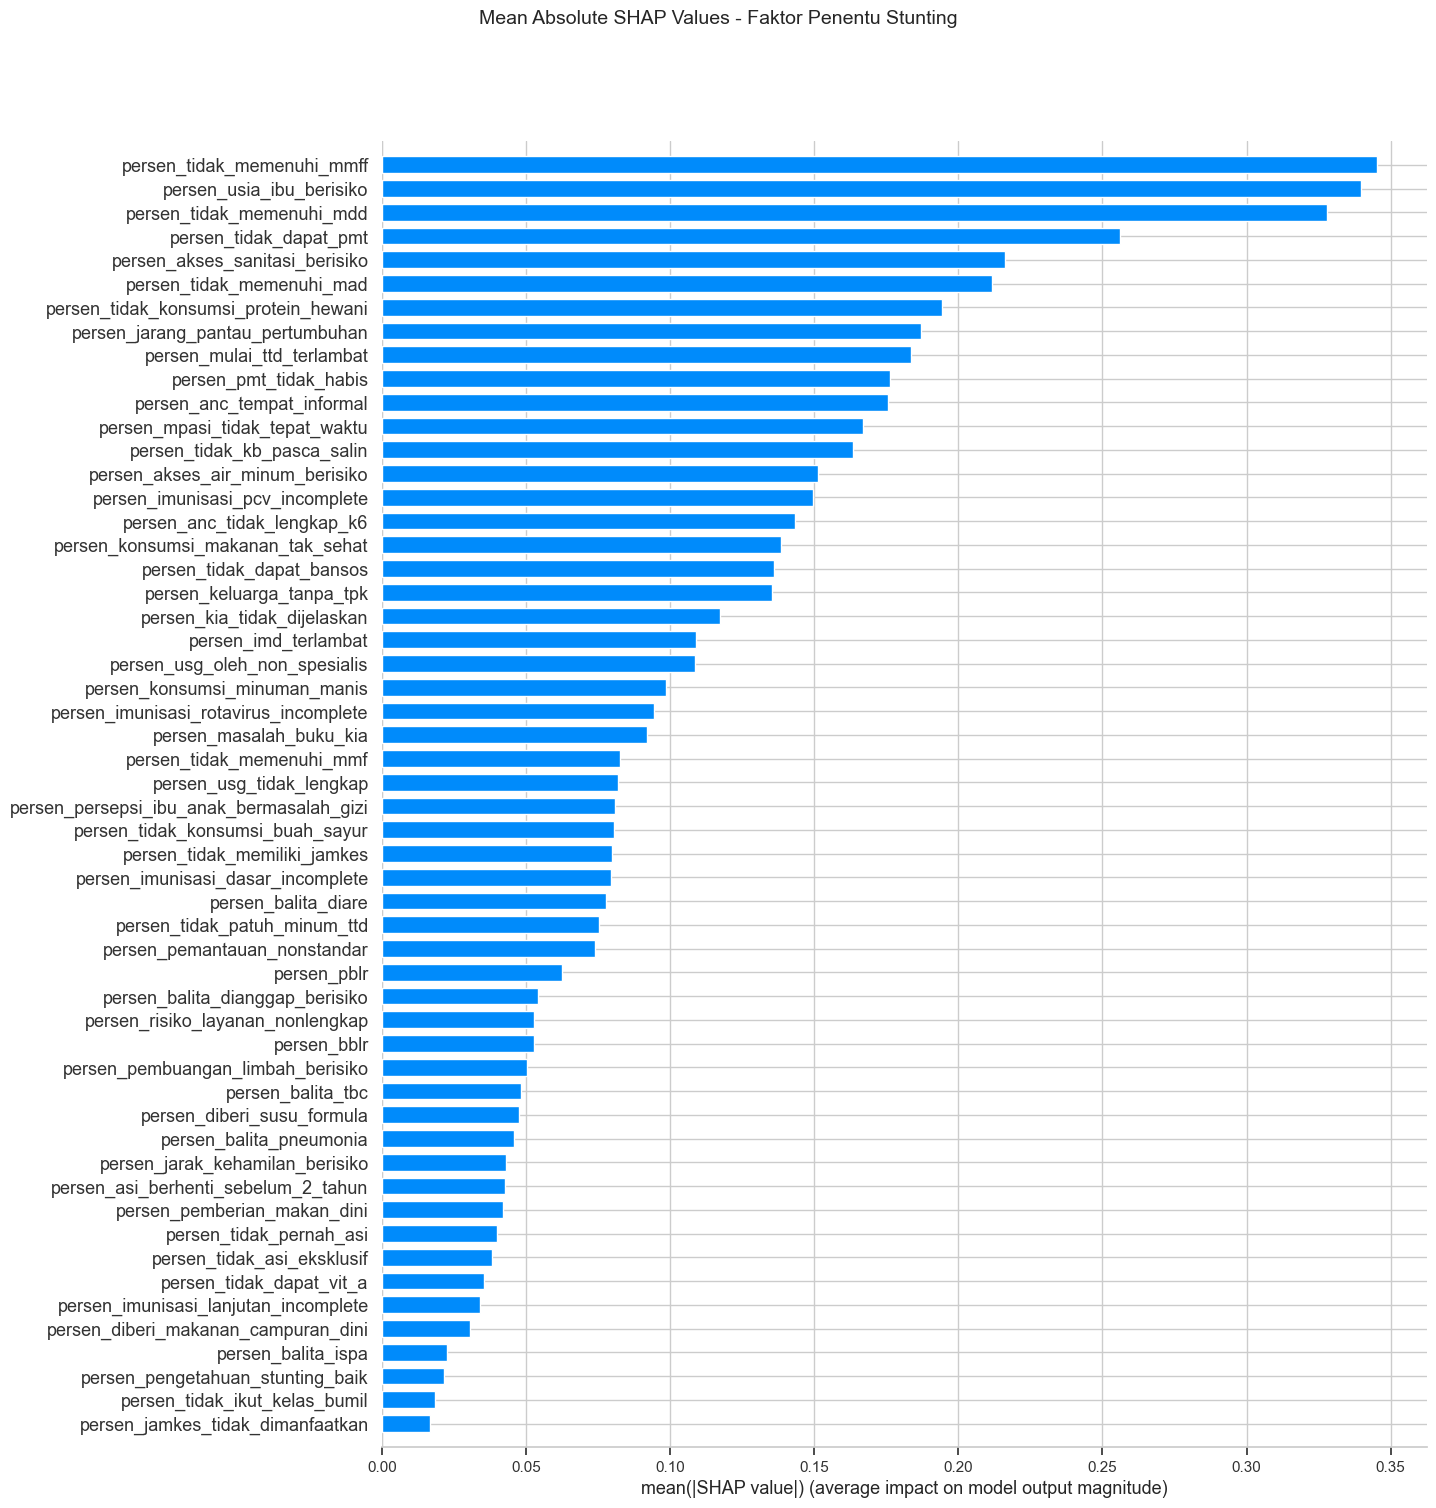

In [24]:
# Mean Absolute SHAP values bar plot
shap.summary_plot(
    shap_values,
    X,
    plot_type="bar",
    max_display=20,
    color_bar=False,
    show=False
)
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.suptitle("Mean Absolute SHAP Values - Faktor Penentu Stunting", fontsize=14, y=1.02)
plt.tight_layout(pad=2.5)
plt.show()


shap.summary_plot(
    shap_values,
    X,
    plot_type="bar",
    max_display=X.shape[1],
    color_bar=False,
    show=False
)
fig = plt.gcf()
fig.set_size_inches(15, 15)
fig.suptitle("Mean Absolute SHAP Values - Faktor Penentu Stunting", fontsize=14, y=1.02)
plt.tight_layout(pad=2.5)
plt.show()


<Figure size 700x500 with 0 Axes>

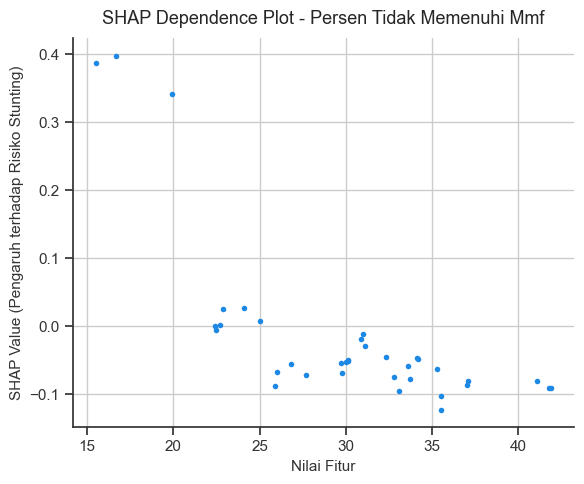

<Figure size 700x500 with 0 Axes>

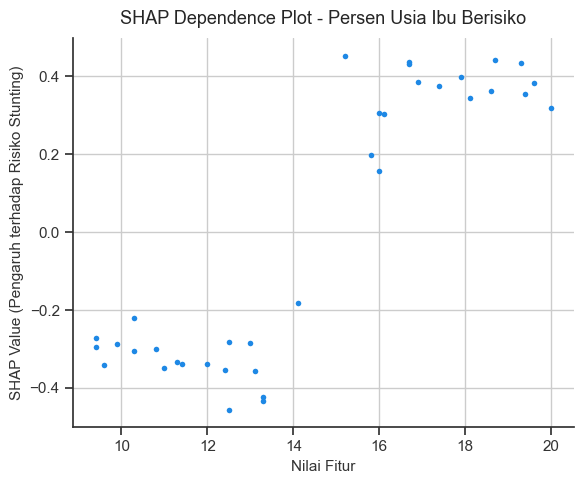

<Figure size 700x500 with 0 Axes>

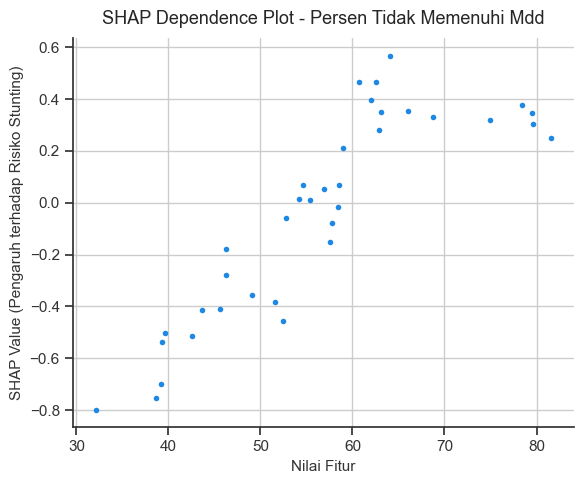

<Figure size 700x500 with 0 Axes>

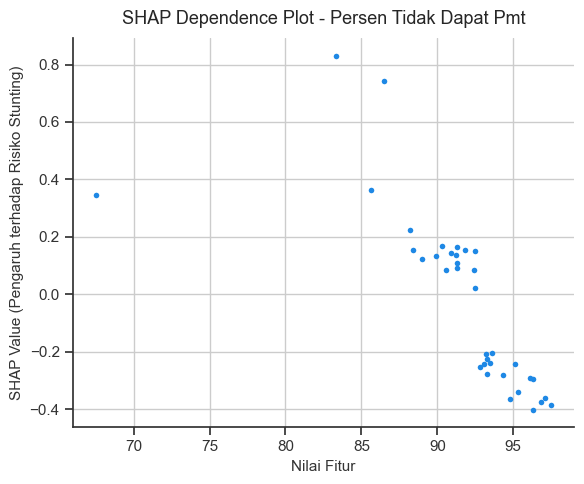

<Figure size 700x500 with 0 Axes>

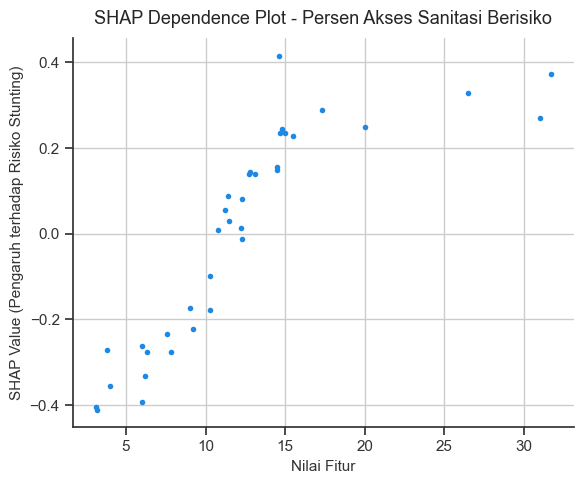

In [27]:
# Dependences plot
# Daftar 5 fitur teratas berdasarkan SHAP
top5_features = [
    "persen_tidak_memenuhi_mmf",
    "persen_usia_ibu_berisiko",
    "persen_tidak_memenuhi_mdd",
    "persen_tidak_dapat_pmt",
    "persen_akses_sanitasi_berisiko"
]

# Visualisasi dependence plot per fitur
for feature in top5_features:
    plt.figure(figsize=(7, 5))
    shap.dependence_plot(
        feature, shap_values, X,
        interaction_index=None, 
        show=False
    )
    plt.title(f"SHAP Dependence Plot - {feature.replace('_', ' ').title()}", fontsize=13, pad=10)
    plt.xlabel("Nilai Fitur", fontsize=11)
    plt.ylabel("SHAP Value (Pengaruh terhadap Risiko Stunting)", fontsize=11)
    plt.tight_layout()
    plt.show()



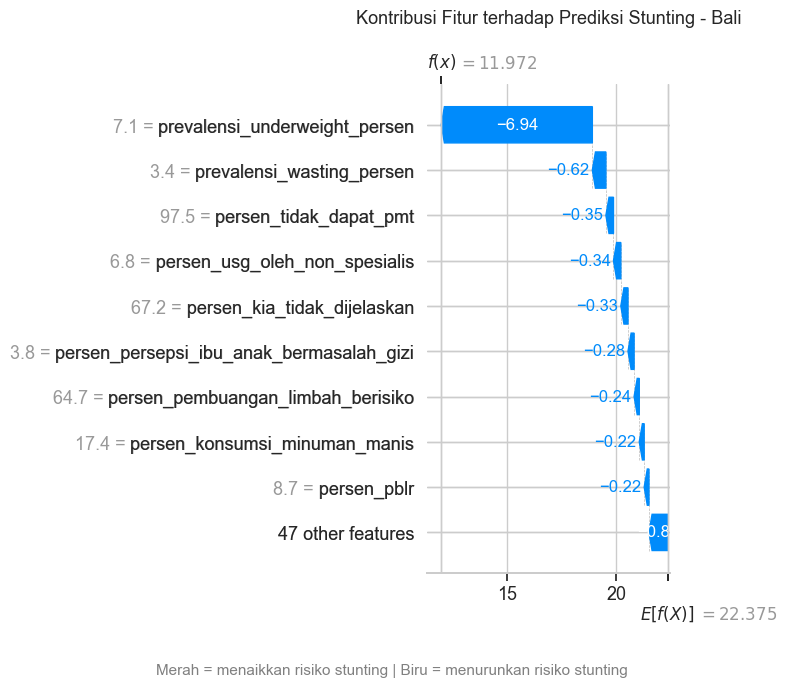

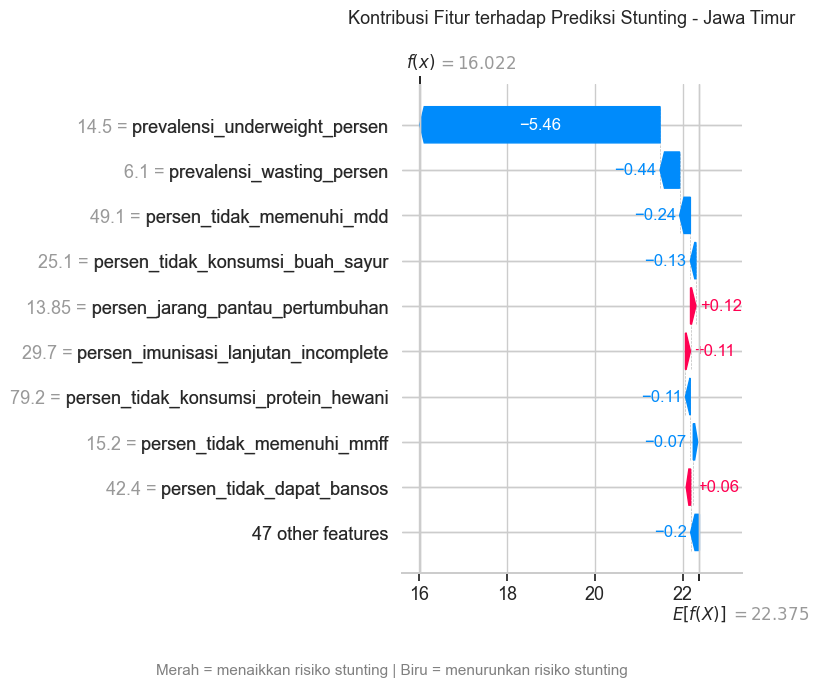

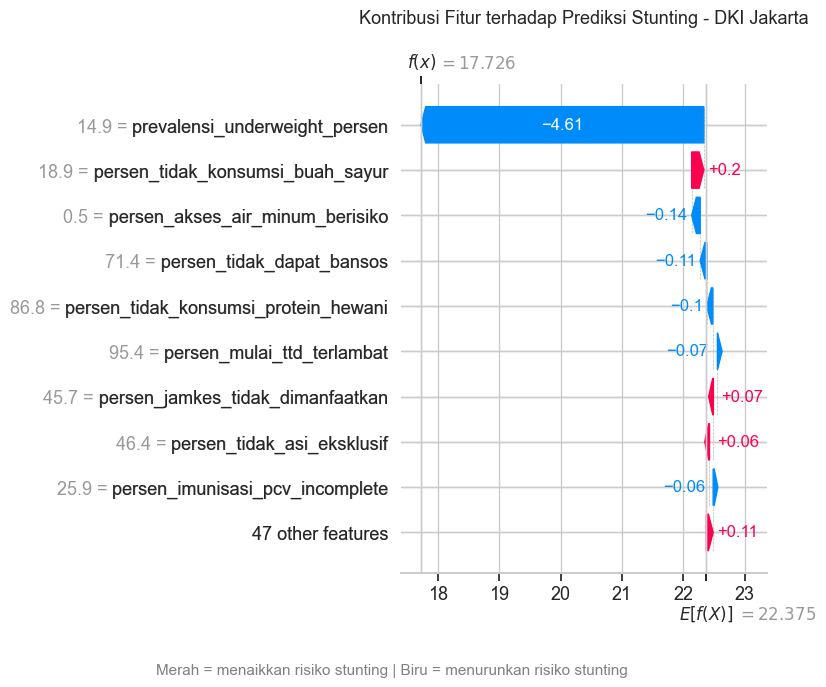

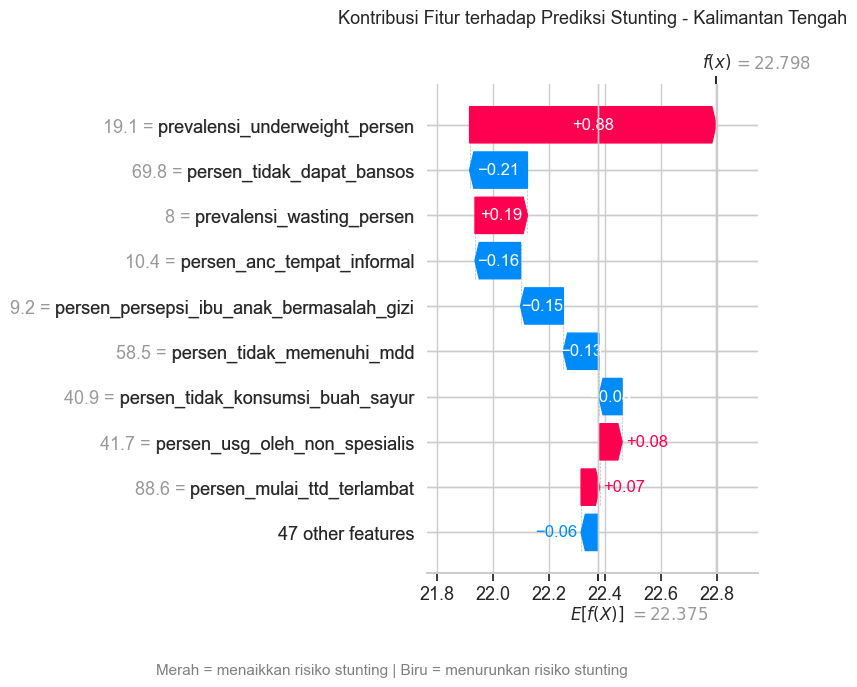

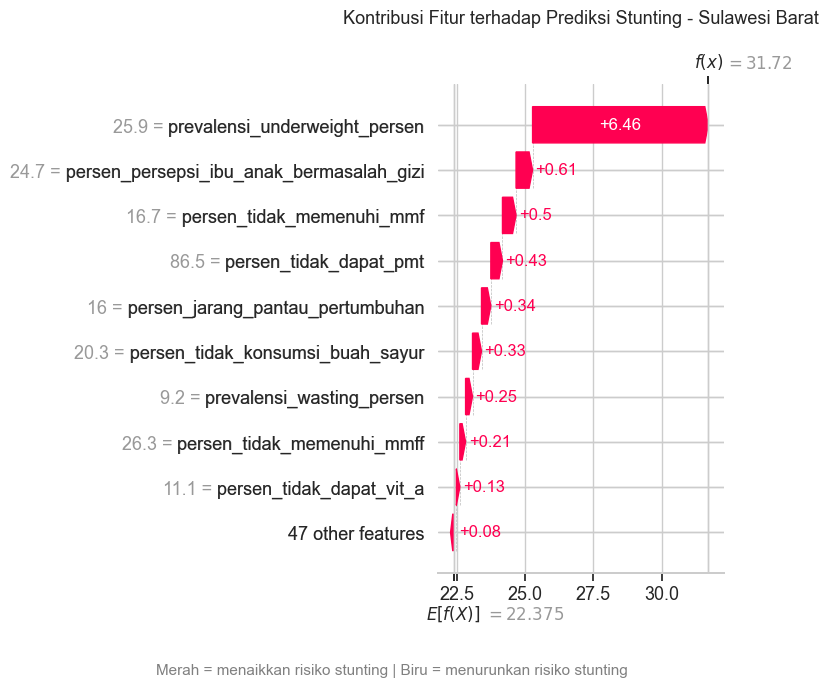

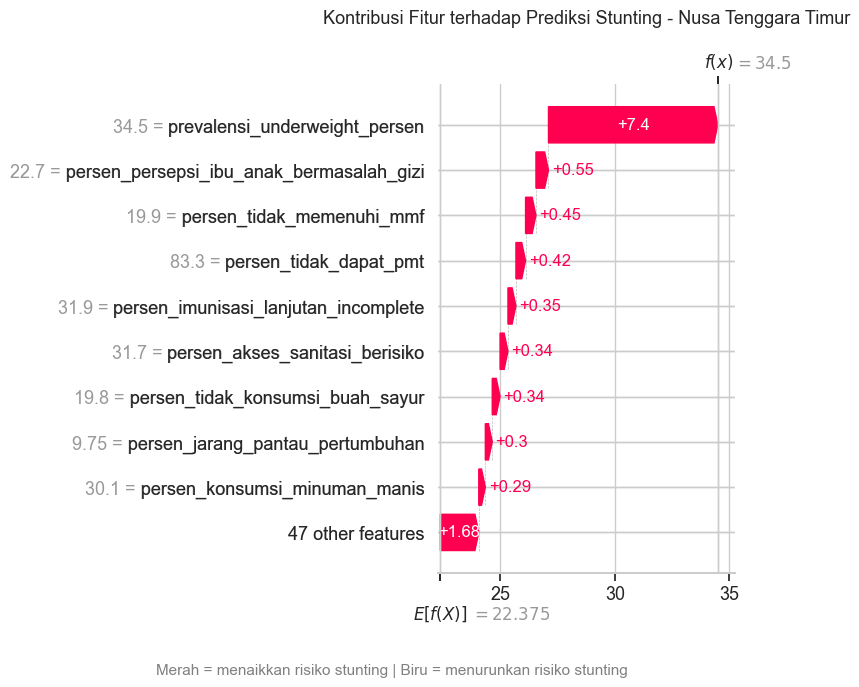

In [ ]:
# SHAP waterfall plot value for a specific province
explainer = shap.TreeExplainer(model_final)
shap_values = explainer(X)

prov_indices = {
    "Bali": 0,
    "Jawa Timur": 1,
    "DKI Jakarta": 8,
    "Kalimantan Tengah": 17,
    "Sulawesi Barat": 34,
    "Nusa Tenggara Timur": 35
}

for prov, i in prov_indices.items():
    shap.plots.waterfall(shap_values[i], show=False)
    plt.title(f"Kontribusi Fitur terhadap Prediksi Stunting - {prov}", fontsize=13, pad=20)
    plt.figtext(
        0.5, -0.05,
        "Merah = menaikkan risiko stunting | Biru = menurunkan risiko stunting",
        ha='center', fontsize=11, color='gray'
    )
    plt.tight_layout()
    plt.show()


